In [33]:
RESULTS_ZIP_FILE = "../../results/pix2code/pix2code.zip"
RESULTS_FOLDER_DESTINATION = "../../results/pix2code/"

In [34]:
import zipfile

with zipfile.ZipFile(RESULTS_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(RESULTS_FOLDER_DESTINATION)


In [3]:
RESULTS_FOLDER = "../../results/pix2code/pix2code"

In [36]:
import os

list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

348

In [38]:
# NOTE:
# This requires modifying the paths inside pix2code project in the following file: web-compiler.py line24
# Also inside Compiler.py line 24 add the following:
# if not token:
#       continue

In [39]:
%run ../../utils/postprocessing.py --folder ../../results/pix2code/pix2code --suffix .gui --pix2code

100%|██████████| 348/348 [00:08<00:00, 40.01it/s]


In [40]:
%run ../../utils/extract_screenshots --folder ../../results/pix2code/pix2code --webGenerator

100%|██████████| 348/348 [06:57<00:00,  1.20s/it]


In [43]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/pix2code/pix2code --pix2codeOriginal

In [4]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [10]:
df.rename(columns={
    'len_pren': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [11]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,similarity_index
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,345.143678,340.706897,345.143678,0.983446,4.436782,0.016416,0.941584
std,82.961702,84.656328,82.961702,0.028444,6.521997,0.028188,0.025570
min,84.000000,84.000000,84.000000,0.873289,0.000000,0.000000,0.874937
25%,348.000000,347.000000,348.000000,0.964444,0.000000,0.000000,0.921571
50%,367.500000,364.000000,367.500000,1.000000,0.000000,0.000000,0.948850
75%,388.000000,386.000000,388.000000,1.000000,14.000000,0.035421,0.955597
max,607.000000,607.000000,607.000000,1.000000,14.000000,0.125000,0.991750


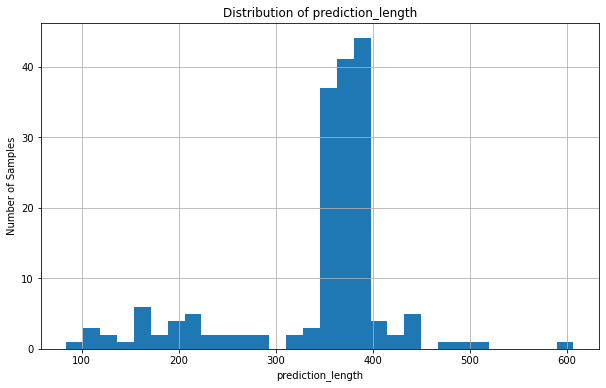

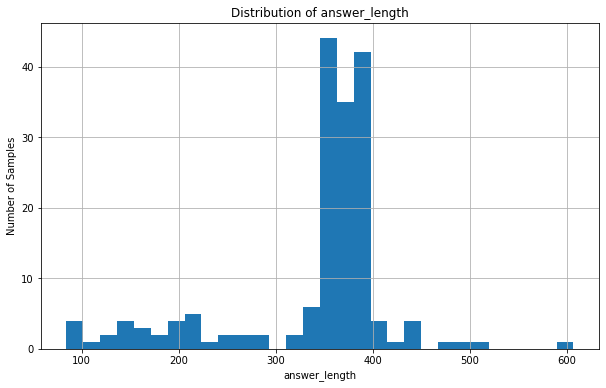

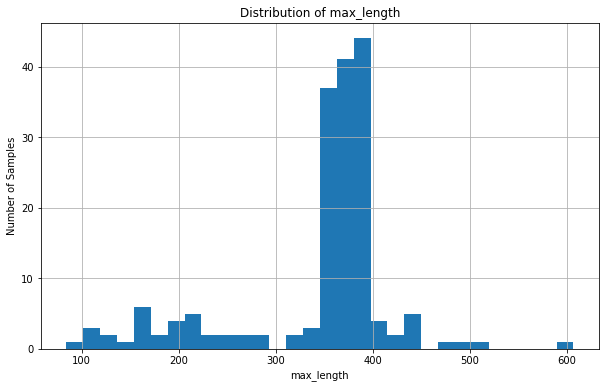

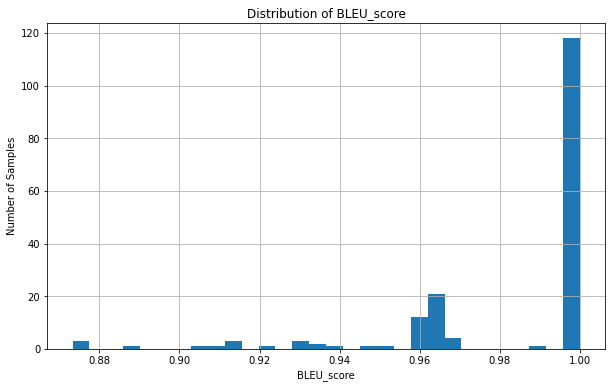

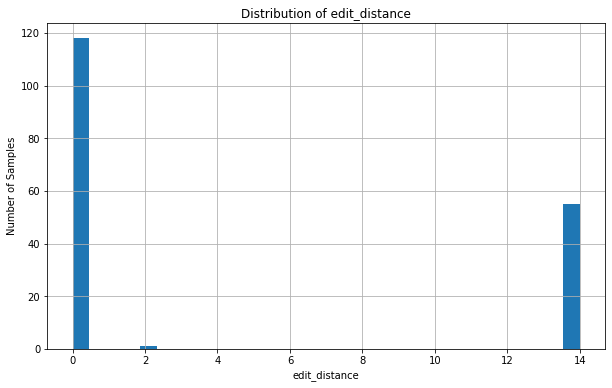

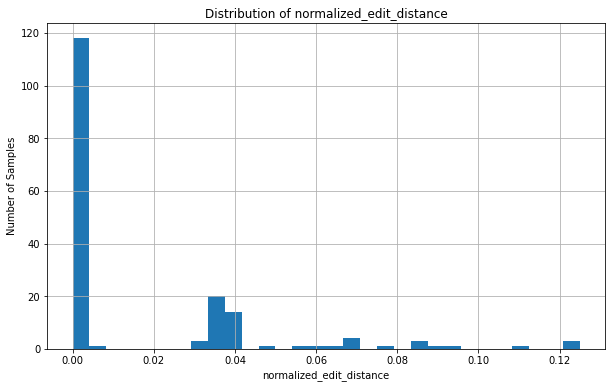

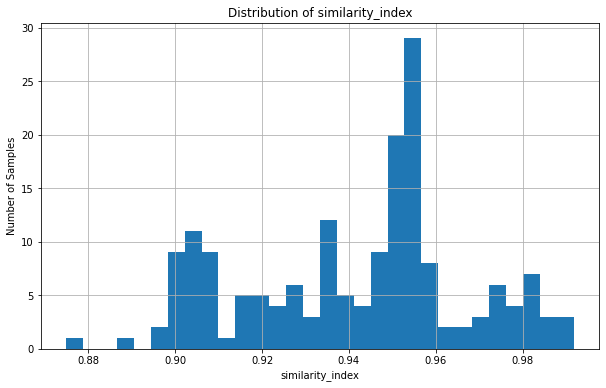

In [12]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "edit_distance", "normalized_edit_distance", "similarity_index"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


In [14]:
!pip3 install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.7 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


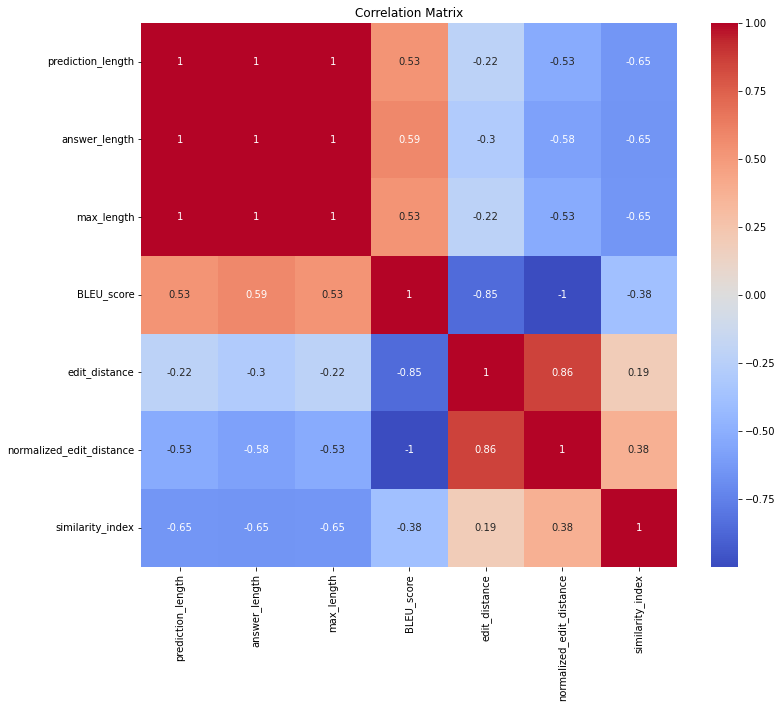

In [15]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

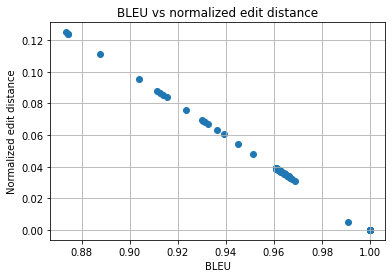

In [16]:
plt.scatter(df["BLEU_score"], df["normalized_edit_distance"])
plt.title("BLEU vs normalized edit distance")
plt.xlabel("BLEU")
plt.ylabel("Normalized edit distance")
plt.grid(True)
plt.show()


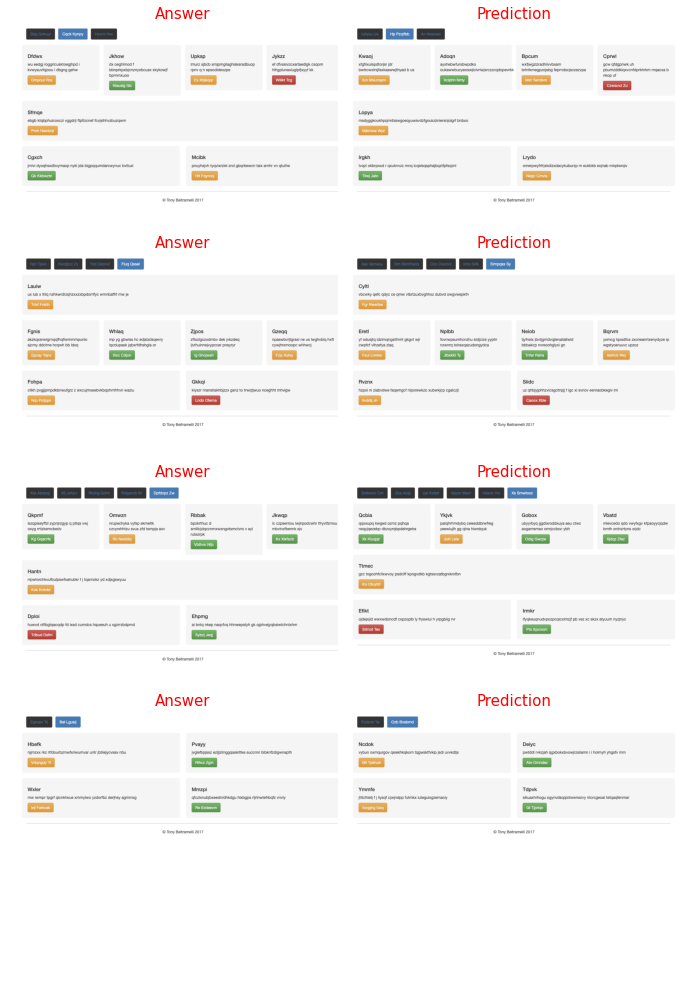

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NUMBER_DISPLAYED = 4

fig, axes = plt.subplots(NUMBER_DISPLAYED, 2, figsize=(10, NUMBER_DISPLAYED*3.5))

for idx, json_file_path in enumerate(all_json_files[:NUMBER_DISPLAYED]):
        answer_img = mpimg.imread(json_file_path.replace(".json", "_answer_processed.png"))
        prediction_img = mpimg.imread(json_file_path.replace(".json", "_pred_processed.png"))
        
        axes[idx, 0].imshow(answer_img)
        axes[idx, 0].set_title('Answer', fontsize=15, color="red")
        axes[idx, 0].axis('off')

        axes[idx, 1].imshow(prediction_img)
        axes[idx, 1].set_title('Prediction', fontsize=15, color="red")
        axes[idx, 1].axis('off')

plt.tight_layout(h_pad=-7)

plt.show()
